In [1]:
import torch
import matplotlib.pyplot as plt
import cv2
import pandas as pd

In [2]:
# Load the trained model 
model = torch.load('./CFExp/weights.pt')
# Set the model to evaluate mode
model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [3]:
# Read the log file using pandas into a dataframe
df = pd.read_csv('./CFExp/log.csv')

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

### Training and testing loss, f1_score and auroc values for the model trained on the CrackForest dataset

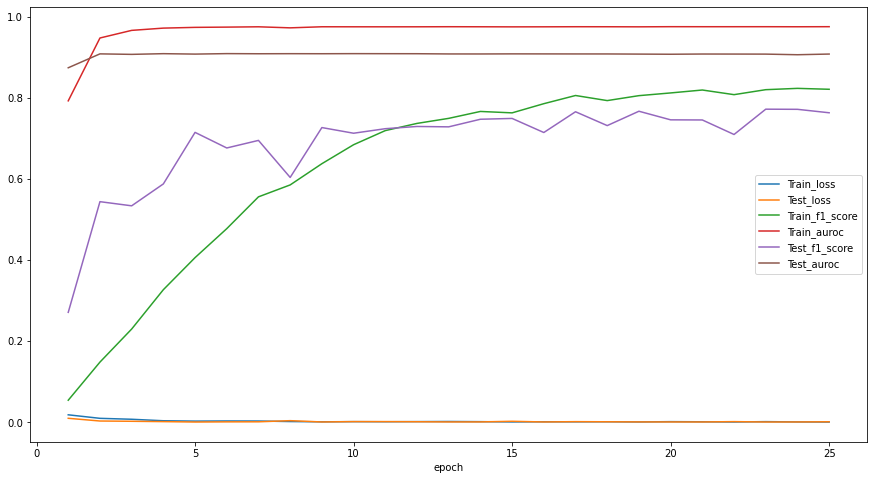

In [5]:
# Plot all the values with respect to the epochs
df.plot(x='epoch',figsize=(15,8));

In [9]:
print(df[['Train_auroc','Test_auroc']].max())

Train_auroc    0.944669
Test_auroc     0.836740
dtype: float64


### Sample Prediction

In [36]:
ino = 5
# Read  a sample image and mask from the data-set
img = cv2.imread(f'./CrackForest/Images/200.jpg').transpose(2,0,1).reshape(1,3,512,512)
mask = cv2.imread(f'./CrackForest/Masks/200.png')
dtype = torch.cuda.float if torch.cuda.is_available() else torch.float
with torch.no_grad():
    a = model(torch.from_numpy(img).type(dtype)/255)

(array([2.21961e+05, 3.83030e+04, 3.90000e+02, 2.91000e+02, 2.46000e+02,
        2.18000e+02, 1.98000e+02, 1.97000e+02, 1.99000e+02, 1.41000e+02]),
 array([-0.11244603,  0.00329876,  0.11904355,  0.23478834,  0.35053313,
         0.46627793,  0.5820227 ,  0.6977675 ,  0.81351227,  0.9292571 ,
         1.0450019 ], dtype=float32),
 <BarContainer object of 10 artists>)

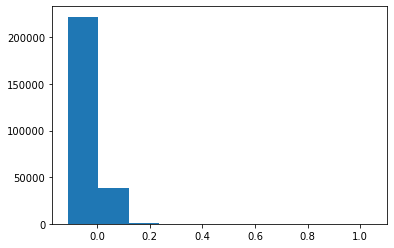

In [37]:
# Plot histogram of the prediction to find a suitable threshold. From the histogram a 0.1 looks like a good choice.
plt.hist(a['out'].data.cpu().numpy().flatten())

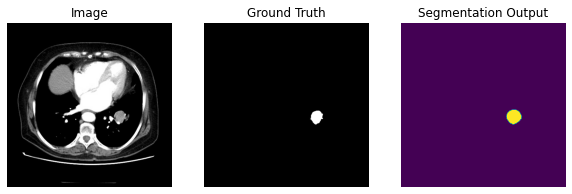

In [38]:
# Plot the input image, ground truth and the predicted output
plt.figure(figsize=(10,10));
plt.subplot(131);
plt.imshow(img[0,...].transpose(1,2,0));
plt.title('Image')
plt.axis('off');
plt.subplot(132);
plt.imshow(mask);
plt.title('Ground Truth')
plt.axis('off');
plt.subplot(133);
plt.imshow(a['out'].cpu().detach().numpy()[0][0] > 0.2);
plt.title('Segmentation Output')
plt.axis('off');
plt.savefig('./CFExp/SegmentationOutput.png',bbox_inches='tight')

In [34]:
a['out'].data.cpu().numpy().flatten().

153600

In [36]:
d = a['out'].cpu().detach().numpy()

In [37]:
d.size

153600

In [42]:
dd = a['out'].cpu().detach().numpy()[0][0]

In [43]:
dd.size

153600

In [20]:
ino = 5
# Read  a sample image and mask from the data-set
img = cv2.imread(f'./CrackForest/Images/1.jpg').transpose(2,0,1).reshape(1,3,512,512)

In [21]:
type(img)

numpy.ndarray

In [22]:
img.shape

(1, 3, 512, 512)